# Weather: 500+ Cities around the world on January 14, 2019
----

### Analysis
* There is a relationship between latitude and temperature! The closer to the equator the warmer the temperature tends to be. At this time of year the temperature, however, is also as warm or warmer in many parts of the southern hemisphere in part because that hemisphere is tilted toward the sun.

* There aren't strong relationships between latitude and the other factors examined. One city stood out, Darna, Lybia.  They are reporting 100% cloudiness, 100% humidity, and the strongest winds (40 mph +).

* There are some extreme outliers in both ends of the temperature spectrum. There are three cities in Australia with temperatures of more than 100 degrees Fahrenheit. There are four cities in Russia with temperatures below minus 50 or more. Interesting to see is all these extreme temperature cities have little to no cloud cover.

## I. Set-Up WeatherPy Program

In [21]:
# Renders figures in the notebook instead of just showing the object
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## II. Generate Cities List

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

#np.random.seed(10)

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city) 
        
cities=cities[0:700]
  
# Print the city count to confirm sufficient count
len(cities)


617

In [25]:
print(cities)

['palmer', 'severo-kurilsk', 'ballina', 'upernavik', 'vaini', 'sentyabrskiy', 'punta arenas', 'mar del plata', 'new norfolk', 'qaanaaq', 'merauke', 'humaita', 'ushuaia', 'belushya guba', 'camacha', 'ancud', 'bluff', 'mataura', 'srivardhan', 'lolua', 'port blair', 'boca do acre', 'fatehabad', 'petukhovo', 'bilibino', 'cockburn town', 'nouadhibou', 'thompson', 'soligalich', 'east london', 'hamilton', 'castro', 'chuy', 'yellowknife', 'pontiac', 'nizwa', 'busselton', 'karamea', 'mount gambier', 'albany', 'rikitea', 'nioro', 'looc', 'chifeng', 'maniitsoq', 'saint george', 'san quintin', 'strathmore', 'port alfred', 'atuona', 'plavsk', 'ambulu', 'kholodnyy', 'kruisfontein', 'kavieng', 'port hardy', 'san patricio', 'srednekolymsk', 'mikkeli', 'aykhal', 'ponta do sol', 'qasigiannguit', 'attawapiskat', 'georgetown', 'rungata', 'rimini', 'mbandaka', 'bethel', 'leningradskiy', 'barentsburg', 'itoman', 'jalu', 'barrow', 'kashi', 'kloulklubed', 'butaritari', 'quatre cocos', 'cape town', 'taolanaro'

## III. Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
count=1

# Build query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q=" 

print(query_url)

#Get weather data using API Call and create a print log
weather_data=[]

for city in cities: 
    print(f"Processing Record {count} | {city}")
    weather_response = requests.get(query_url+city)
    weather_json = weather_response.json()
    weather_data.append(weather_json)
    count=count+1
    # Add a one second interval between queries to stay within API query limits
    #time.sleep(1)
   
weather_data[0]


http://api.openweathermap.org/data/2.5/weather?appid=d1ec1199167636ee559cb668c2faf00c&units=imperial&q=
Processing Record 1 | palmer
Processing Record 2 | severo-kurilsk
Processing Record 3 | ballina
Processing Record 4 | upernavik
Processing Record 5 | vaini
Processing Record 6 | sentyabrskiy
Processing Record 7 | punta arenas
Processing Record 8 | mar del plata
Processing Record 9 | new norfolk
Processing Record 10 | qaanaaq
Processing Record 11 | merauke
Processing Record 12 | humaita
Processing Record 13 | ushuaia
Processing Record 14 | belushya guba
Processing Record 15 | camacha
Processing Record 16 | ancud
Processing Record 17 | bluff
Processing Record 18 | mataura
Processing Record 19 | srivardhan
Processing Record 20 | lolua
Processing Record 21 | port blair
Processing Record 22 | boca do acre
Processing Record 23 | fatehabad
Processing Record 24 | petukhovo
Processing Record 25 | bilibino
Processing Record 26 | cockburn town
Processing Record 27 | nouadhibou
Processing Record

Processing Record 246 | vestmannaeyjar
Processing Record 247 | pevek
Processing Record 248 | henties bay
Processing Record 249 | tiarei
Processing Record 250 | petit goave
Processing Record 251 | flinders
Processing Record 252 | torbay
Processing Record 253 | bereda
Processing Record 254 | sinazongwe
Processing Record 255 | ust-kamchatsk
Processing Record 256 | batagay-alyta
Processing Record 257 | anantapur
Processing Record 258 | lensk
Processing Record 259 | portland
Processing Record 260 | menongue
Processing Record 261 | berzovia
Processing Record 262 | rio tercero
Processing Record 263 | saleaula
Processing Record 264 | trinidad
Processing Record 265 | qaqortoq
Processing Record 266 | miri
Processing Record 267 | mys shmidta
Processing Record 268 | saint-georges
Processing Record 269 | manokwari
Processing Record 270 | abrau-dyurso
Processing Record 271 | faanui
Processing Record 272 | margate
Processing Record 273 | longyearbyen
Processing Record 274 | hithadhoo
Processing Recor

Processing Record 493 | juba
Processing Record 494 | bina-etawa
Processing Record 495 | blyth
Processing Record 496 | katsuura
Processing Record 497 | bangassou
Processing Record 498 | pishin
Processing Record 499 | imbituba
Processing Record 500 | campos
Processing Record 501 | gizo
Processing Record 502 | zhigansk
Processing Record 503 | praia da vitoria
Processing Record 504 | dharchula
Processing Record 505 | solwezi
Processing Record 506 | caravelas
Processing Record 507 | altamont
Processing Record 508 | kalmunai
Processing Record 509 | vila franca do campo
Processing Record 510 | lompoc
Processing Record 511 | mingguang
Processing Record 512 | tartagal
Processing Record 513 | champerico
Processing Record 514 | magburaka
Processing Record 515 | el prat de llobregat
Processing Record 516 | wellington
Processing Record 517 | yunjinghong
Processing Record 518 | abashiri
Processing Record 519 | eyemouth
Processing Record 520 | springbok
Processing Record 521 | kuryk
Processing Record

{'coord': {'lon': -149.11, 'lat': 61.6},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 25.95,
  'pressure': 1015,
  'humidity': 92,
  'temp_min': 23.54,
  'temp_max': 28.04},
 'visibility': 16093,
 'wind': {'speed': 3, 'deg': 67.0008},
 'clouds': {'all': 1},
 'dt': 1547510280,
 'sys': {'type': 1,
  'id': 7653,
  'message': 0.0047,
  'country': 'US',
  'sunrise': 1547578625,
  'sunset': 1547601317},
 'id': 5871146,
 'name': 'Palmer',
 'cod': 200}

In [28]:
#Set up a list to hold weather data
lat_data=[]
date_data=[]
cloud_data=[]
country_data=[]
humidity_data=[]
lng_data=[]
max_temp_data=[]
wind_data=[]
city_data=[]
skip_count=0
    
#Use a for loop to bring in data from JSON object and store in lists
for weather in weather_data:
    try:
        lat_data.append(weather['coord']['lat'])
        date_data.append(weather['dt'])
        country_data.append(weather['sys']['country'])
        cloud_data.append(weather['clouds']['all'])
        humidity_data.append(weather['main']['humidity'])
        lng_data.append(weather['coord']['lon'])
        max_temp_data.append(weather['main']['temp_max'])
        wind_data.append(weather['wind']['speed'])
        city_data.append(weather['name'])
    except: 
        skip_count=skip_count+1
        print(f"Skipping a city because no weather data: {skip_count}")
        continue

Skipping a city because no weather data: 1
Skipping a city because no weather data: 2
Skipping a city because no weather data: 3
Skipping a city because no weather data: 4
Skipping a city because no weather data: 5
Skipping a city because no weather data: 6
Skipping a city because no weather data: 7
Skipping a city because no weather data: 8
Skipping a city because no weather data: 9
Skipping a city because no weather data: 10
Skipping a city because no weather data: 11
Skipping a city because no weather data: 12
Skipping a city because no weather data: 13
Skipping a city because no weather data: 14
Skipping a city because no weather data: 15
Skipping a city because no weather data: 16
Skipping a city because no weather data: 17
Skipping a city because no weather data: 18
Skipping a city because no weather data: 19
Skipping a city because no weather data: 20
Skipping a city because no weather data: 21
Skipping a city because no weather data: 22
Skipping a city because no weather data: 

In [29]:
#Convert Raw Data to DataFrame
weather_pd = pd.DataFrame({"City": city_data,"Cloudiness": cloud_data,"Country": country_data,"Date": date_data, 
                           "Humidity": humidity_data,"Lat": lat_data, "Lng": lng_data,
                           "Max Temp": max_temp_data, "Wind Speed": wind_data})

#Export the city and weather data into a  csv
weather_pd.to_csv("output_data/weather_data.csv")

#Count the number of rows per variable
weather_pd.count()
                           

City          558
Cloudiness    558
Country       558
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
dtype: int64

In [65]:
#Display the DataFrame
weather_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Palmer,1,US,1547510280,92,61.60,-149.11,28.04,3.00
1,Severo-Kurilsk,56,RU,1547512872,100,50.68,156.12,28.30,10.38
2,Ballina,88,IE,1547512871,98,54.11,-9.15,47.83,13.85
3,Upernavik,20,GL,1547513058,100,72.79,-56.15,-11.17,17.72
4,Vaini,0,IN,1547510400,71,15.34,74.49,57.20,4.56


## IV. Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### A. Latitude vs. Maximum Temperature (F) Plot

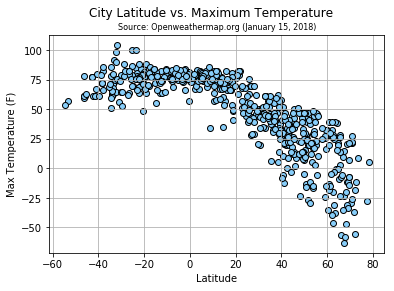

In [31]:
plt.suptitle('City Latitude vs. Maximum Temperature')
plt.title('Source: Openweathermap.org (January 14, 2018)', fontsize=8)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.scatter(weather_pd['Lat'], weather_pd['Max Temp'], marker="o", facecolors="lightskyblue", edgecolors="black")
plt.grid()
plt.savefig("images/Lat_Temp.png")

#### "Feeling hot, hot hot" Cities with temperatures greater than 95 degrees

In [61]:
out_hot_temp=weather_pd[weather_pd["Max Temp"]>95]
out_hot_temp=out_hot_temp.sort_values(by=["Max Temp"], ascending=False)
out_hot_temp

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
221,Broken Hill,0,AU,1547510700,11,-31.97,141.45,104.0,20.80
175,Yulara,0,AU,1547510400,14,-25.24,130.99,100.4,6.93
290,Alice Springs,0,AU,1547510400,15,-23.70,133.88,100.4,6.93
144,Dubbo,0,AU,1547510400,16,-32.25,148.60,98.6,14.99


#### "Baby it is cold outside": Temperatures more than minus 50!

In [60]:
out_cold_temp=weather_pd[weather_pd["Max Temp"]<-50]
out_cold_temp=out_cold_temp.sort_values(by=["Max Temp"], ascending=True)
out_cold_temp

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
363,Verkhoyansk,8,RU,1547513120,0,67.55,133.39,-63.06,2.55
235,Batagay-Alyta,0,RU,1547513094,0,67.80,130.41,-58.24,2.77
55,Aykhal,0,RU,1547513066,0,65.95,111.51,-56.67,2.73
471,Saskylakh,0,RU,1547513142,0,71.97,114.09,-55.14,7.76


#### B. Latitude vs. Humidity (%) Plot

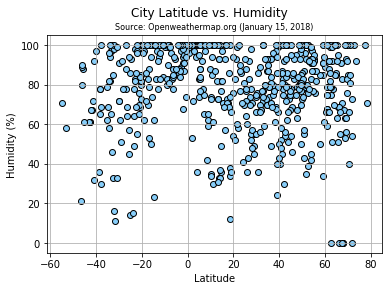

In [32]:
plt.suptitle('City Latitude vs. Humidity')
plt.title('Source: Openweathermap.org (January 14, 2018)', fontsize=8)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.scatter(weather_pd['Lat'],weather_pd['Humidity'], marker="o", facecolors="lightskyblue", edgecolors="black")
plt.grid()
plt.savefig('images/Lat_Humidity.png')

#### C. Latitude vs. Cloudiness (%) Plot

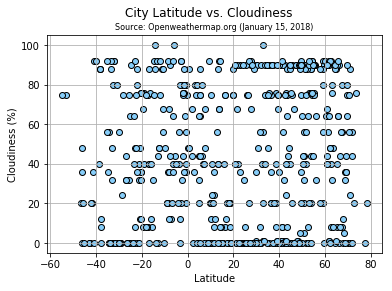

In [33]:
plt.suptitle('City Latitude vs. Cloudiness')
plt.title('Source: Openweathermap.org (January 14, 2018)', fontsize=8)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.scatter(weather_pd['Lat'], weather_pd["Cloudiness"], marker="o", facecolors="lightskyblue", edgecolors="black")
plt.grid()
plt.savefig("images/Lat_Cloudy.png")


#### D. Latitude vs. Wind Speed (mph) Plot

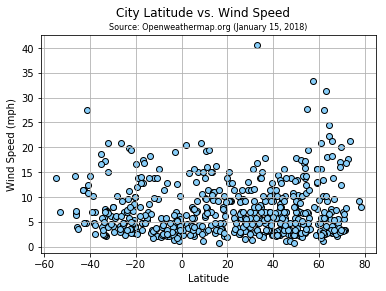

In [34]:
plt.suptitle('City Latitude vs. Wind Speed')
plt.title('Source: Openweathermap.org (January 14, 2018)', fontsize=8)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.scatter(weather_pd['Lat'],weather_pd["Wind Speed"],marker='o', facecolors='lightskyblue', edgecolors='black')
plt.grid()
plt.savefig('images/Lat_WindSpeed.png')

#### "Blowing in the Wind": No hurricanes


In [64]:
out_wind=weather_pd[weather_pd["Wind Speed"]>30]
out_wind=out_wind.sort_values(by=["Wind Speed"], ascending=False)
out_wind

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
158,Darnah,100,LY,1547513081,100,32.77,22.64,60.70,40.53
403,Visby,88,SE,1547511600,50,57.64,18.30,33.80,33.33
369,Beringovskiy,76,RU,1547513081,99,63.05,179.32,-3.21,31.41
